### Instructions

**Part A)**

0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)


1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.
2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages
3) Use GARCH to **model** asset data and **forecast**.
3) **Plot** forecasts.
    
This part is for you to get you familiar with julia, its syntax, and pacakges.

In [1]:
#Activate the environment
using Pkg
Pkg.activate(".")

  Activating project at `d:\Dokumenty\Vejška\Magisterské studium\Financial Econometrics 2\Project1\Financial-Econometrics-II`

---

In [2]:
#Check the status
Pkg.status()

Status `D:\Dokumenty\Vejška\Magisterské studium\Financial Econometrics 2\Project1\Financial-Econometrics-II\Project.toml`


  [a93c6f00] DataFrames v1.4.1
  [945b72a4] MarketData v0.13.12
  [f3b207a7] StatsPlots v0.15.4
  [10745b16] Statistics


In [ ]:
#Instantiate - not needed to run anymore
#Pkg.instantiate()

In [ ]:
#Add required packages  - not needed to run anymore
# Pkg.add("MarketData")
# Pkg.add("Statistics")
# Pkg.add("DataFrames")
# Pkg.add("StatsPlots")

----

### A.1.
 * Download data for an asset of our choice
 
I followed this [example](https://juliaquant.github.io/MarketData.jl/stable/downloads/) 

In [3]:
#Load packages
using MarketData
using Statistics
using DataFrames
using StatsPlots

In [4]:
#time range chosen arbitrarily
t1 = DateTime(2018, 1, 1)
t2 = DateTime(2022, 1, 1)

#downloading daily SP500 data from Yahoo Finance
SP500 = MarketData.yahoo("^GSPC", YahooOpt(period1 = t1, period2 = t2))

1008×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2018-01-02 to 2021-12-31
│            │ Open      │ High      │ Low       │ Close     │ AdjClose  │
├────────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ 2018-01-02 │ 2683.73   │ 2695.8899 │ 2682.3601 │ 2695.8101 │ 2695.8101 │
│ 2018-01-03 │ 2697.8501 │ 2714.3701 │ 2697.77   │ 2713.0601 │ 2713.0601 │
│ 2018-01-04 │ 2719.3101 │ 2729.29   │ 2719.0701 │ 2723.99   │ 2723.99   │
│ 2018-01-05 │ 2731.3301 │ 2743.45   │ 2727.9199 │ 2743.1499 │ 2743.1499 │
│ 2018-01-08 │ 2742.6699 │ 2748.51   │ 2737.6001 │ 2747.71   │ 2747.71   │
│ 2018-01-09 │ 2751.1499 │ 2759.1399 │ 2747.8601 │ 2751.29   │ 2751.29   │
│ 2018-01-10 │ 2745.55   │ 2750.8    │ 2736.0601 │ 2748.23   │ 2748.23   │
│ 2018-01-11 │ 2752.97   │ 2767.5601 │ 2752.78   │ 2767.5601 │ 2767.5601 │
│ ⋮          │ ⋮         │ ⋮         │ ⋮         │ ⋮         │ ⋮         │
│ 2021-12-22 │ 4650.3599 │ 4697.6699 │ 4645.5298 │ 4696.5601 │ 4696.5601 │
│ 2021-12-23 │ 4703.96 

In [5]:
#for now keep only Adjusted Closing price (we may need to change this later)
SP500 = SP500.AdjClose

1008×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2018-01-02 to 2021-12-31
│            │ AdjClose  │
├────────────┼───────────┤
│ 2018-01-02 │ 2695.8101 │
│ 2018-01-03 │ 2713.0601 │
│ 2018-01-04 │ 2723.99   │
│ 2018-01-05 │ 2743.1499 │
│ 2018-01-08 │ 2747.71   │
│ 2018-01-09 │ 2751.29   │
│ 2018-01-10 │ 2748.23   │
│ 2018-01-11 │ 2767.5601 │
│ ⋮          │ ⋮         │
│ 2021-12-22 │ 4696.5601 │
│ 2021-12-23 │ 4725.79   │
│ 2021-12-27 │ 4791.1899 │
│ 2021-12-28 │ 4786.3501 │
│ 2021-12-29 │ 4793.0601 │
│ 2021-12-30 │ 4778.73   │
│ 2021-12-31 │ 4766.1802 │

### A.2.
* Plot data, do summary statistics

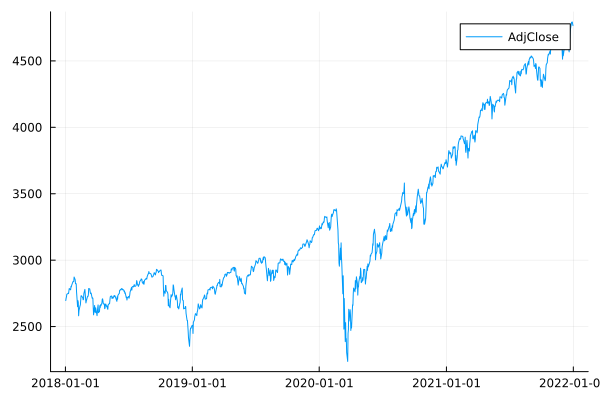

In [6]:
plot(SP500)